In [1]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [3]:
with open("amazon_cells_labelled.txt") as f:
    content = f.readlines()
content[0:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n']

In [4]:
## Remove leading and trailing white space
content = [x.strip() for x in content]
## Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]
sentences[0:10]
labels[0:10]

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']

In [5]:
## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1

# Pre-processing the text data

To input data into the any model, the data input must be in vector form. We will do the following transformations:

Remove punctuation and numbers

Transform all words to lower-case

Remove stop words (e.g. the, a, that, this, it, …)


Tokenizer the texts

Convert the sentences into vectors, using a bag-of-words representation

In [6]:
## Demonstrate ##
def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt

stoppers = ['a', 'is', 'of','the','this','uhm','uh']
removeStopWords(stoppers, "this is a test of the stop word removal code")

'test stop word removal code'

In [7]:
from nltk.corpus import stopwords
stops = stopwords.words("English")
removeStopWords(stops, "this is a test of the stop word removal code.")

'test stop word removal code.'

In [8]:
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x
## Remove digits ##
digits = [str(x) for x in range(10)]
remove_digits = [full_remove(x, digits) for x in sentences]
## Remove punctuation ##
remove_punc = [full_remove(x, list(string.punctuation)) for x in remove_digits]
## Make everything lower-case and remove any white space ##
sents_lower = [x.lower() for x in remove_punc]
sents_lower = [x.strip() for x in sents_lower]
## Remove stop words ##
from nltk.corpus import stopwords
stops = stopwords.words("English")
def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt
sents_processed = [removeStopWords(stops,x) for x in sents_lower]

In [9]:
sents_processed

['way plug us unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversations lasting minutes major problems',
 'mic great',
 'jiggle plug get line right get decent volume',
 'several dozen several hundred contacts imagine fun sending one one',
 'razr owner must',
 'needless say wasted money',
 'waste money time',
 'sound quality great',
 'impressed going original battery extended battery',
 'two seperated mere ft started notice excessive static garbled sound headset',
 'good quality though',
 'design odd ear clip comfortable',
 'highly recommend one blue tooth phone',
 'advise everyone fooled',
 'far good',
 'works great',
 'clicks place way makes wonder long mechanism would last',
 'went motorola website followed directions could get pair',
 'bought use kindle fire absolutely loved',
 'commercials misleading',
 'yet run new battery two bars three days without charging',
 'bought mother problem battery',
 'great pocket pc phone combination',
 'owned 

In [10]:
stop_set = ['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
sents_processed = [removeStopWords(stop_set,x) for x in sents_lower]

In [11]:
sents_processed

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time',
 'and sound quality is great',
 'was very impressed when going original battery extended battery',
 'if two were seperated by mere ft started notice excessive static and garbled sound headset',
 'very good quality though',
 'design is very odd as ear clip is not very comfortable at all',
 'highly recommend for any one who has blue tooth phone',
 'advise everyone do not be fooled',
 'so far so good',
 'works great',
 'clicks into place in way that makes you wonder how long that mechanism would last',
 'went on

In [12]:
import nltk
def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words
    
def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words    
## Demonstrate ##    
str = "Please don't unbuckle your seat-belt while I am driving, he said"
print("porter:", stem_with_porter(str.split()))

print("lancaster:", stem_with_lancaster(str.split()))

porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']
lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']


Let’s try on our sents_processed to see whether it makes sense.

In [13]:
porter = [stem_with_porter(x.split()) for x in sents_processed]
porter = [" ".join(i) for i in porter]
porter[0:10]

['so there is no way for me plug in here in us unless go by convert',
 'good case excel valu',
 'great for jawbon',
 'tie charger for convers last more than minut major problem',
 'mic is great',
 'have jiggl plug get line up right get decent volum',
 'if you have sever dozen or sever hundr contact then imagin fun send each them one by one',
 'if you are razr owner you must have thi',
 'needless say wast my money',
 'what wast money and time']

4. Term Document Inverse Document Frequency (TD/IDF). This is a measure of the relative importance of a word within a document, in the context of multiple documents. In our case here, multiple reviews.
We start with the TD part — this is simply a normalized frequency of the word in the document:
(word count in document) / (total words in document)

The IDF is a weighting of the uniquess of the word across all of the documents.
Here is the complete formula of TD/IDF:

td_idf(t,d) = wc(t,d)/wc(d) / dc(t)/dc()

where:

— wc(t,d) = # of occurrences of term t in doc d

— wc(d) = # of words in doc d

— dc(t) = # of docs that contain at least 1 occurrence of term t

— dc() = # of docs in collection

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 6000, ngram_range=(1,5))
data_features = vectorizer.fit_transform(sents_processed)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()

In [15]:
np.random.seed(0)
test_index = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_index = list(set(range(len(labels))) - set(test_index))
train_data = data_mat[train_index,]
train_labels = y[train_index]
test_data = data_mat[test_index,]
test_labels = y[test_index]

# TextBlob
TextBlob: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels. TextBlod finds all the words and phrases that it can assign polarity and subjectivity to, and average all of them together


In [17]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [18]:
from textblob import TextBlob
#Create polarity function and subjectivity function
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
pol_list = [pol(x) for x in sents_processed]
sub_list = [sub(x) for x in sents_processed]

In [21]:
print(sub_list[0:10])
print(pol_list[0:10])

[0.0, 0.8, 0.75, 0.3333333333333333, 0.75, 0.6011904761904762, 0.06666666666666667, 0.0, 0.5, 0.0]
[0.0, 0.85, 0.8, 0.1875, 0.8, 0.22619047619047616, 0.09999999999999999, 0.0, -0.35, -0.2]


# Logistic Regression

In [25]:
from sklearn.linear_model import SGDClassifier
## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(train_data, train_labels)
## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_[0,:]
b = clf.intercept_
## Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)
## Compute errors
errs_train = np.sum((preds_train > 0.0) != (train_labels > 0.0))
errs_test = np.sum((preds_test > 0.0) != (test_labels > 0.0))
print("Training error: ", float(errs_train)/len(train_labels))
print("Test error: ", float(errs_test)/len(test_labels))


Training error:  0.004
Test error:  0.226


In [29]:
## Convert vocabulary into a list:
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])])
## Get indices of sorting w
inds = np.argsort(w)
## Words with large negative values
neg_inds = inds[0:50]
print("Highly negative words: ")
print([ (x) for x in list(vocab[neg_inds])])
## Words with large positive values
pos_inds = inds[-49:-1]
print("Highly positive words: ")
print([(x) for x in list(vocab[pos_inds])])

Highly negative words: 
['worst', 'does', 'terrible', 'work', 'drain', 'poor', 'disappointed', 'kind', 'hear', 'bad', 'good price', 'doesn', 'does work', 'stupid', 'company', 'unreliable', 'reccommend', 'contacts', 'buy', 'cheap', 'didn', 'beware', 'pay guess', 'used dirty', 'dying', 'don buy', 'returning', 'use unreliable', 'broke', 'pay', 'sending', 'wrong', 'turn', 'don buy product', 'buy product', 'worst phone', 'felt', 'money', 'looking', 'buttons', 'couldn figure', 'smell', 'product wrong', 'later', 'useless', 'don', 'return', 'uncomfortable', 'does fit', 'sunglasses']
Highly positive words: 
['styling', 'easy use', 'case', 'car', 'pretty', 'sister', 'sister loves', 'certainly', 'love phone', 'software brilliant', 'clear', 'sturdy', 'seller', 'fits', 'jawbone', 'looks nice', 'satisfied', 'glad', 'decent', 'plantronics', 'holding', 'crisp', 'hands', 'functionality', 'pleased', 'wanted', 'quite', 'good product', 'better', 'far', 'priced', 'price', 'works fine', 'great phone', 'year

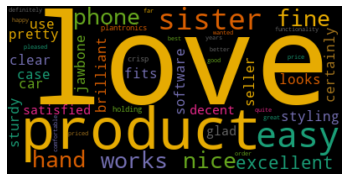

In [32]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_set, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)
#plt.rcParams['figure.figsize'] = [16, 6]
wc.generate(" ".join(list(vocab[pos_inds])))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")    
plt.show()

# NAIVE Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB().fit(train_data, train_labels)
nb_preds_test = nb_clf.predict(test_data)
nb_errs_test = np.sum((nb_preds_test > 0.0) != (test_labels > 0.0))
print("Test error: ", float(nb_errs_test)/len(test_labels))


Test error:  0.234


In [35]:
print(nb_clf.predict(vectorizer.transform(["It's a sad movie but very good"])))

print(nb_clf.predict(vectorizer.transform(["Waste of my time"])))

print(nb_clf.predict(vectorizer.transform(["It is not what like"])))

print(nb_clf.predict(vectorizer.transform(["It is not what I m looking for"])))


[1]
[-1]
[-1]
[-1]


# LSTM networks

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
max_review_length = 200
tokenizer = Tokenizer(num_words=10000,  #max no. of unique words to keep
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True #convert to lower case
                     )
tokenizer.fit_on_texts(sents_processed)

In [38]:
X = tokenizer.texts_to_sequences(sents_processed)
X = sequence.pad_sequences(X, maxlen= max_review_length)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1000, 200)


In [39]:
import pandas as pd
Y=pd.get_dummies(y).values
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [40]:
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))
train_data = X[train_inds,]
train_labels = Y[train_inds]
test_data = X[test_inds,]
test_labels = Y[test_inds]

In [41]:
EMBEDDING_DIM = 200
model = Sequential()
model.add(Embedding(10000, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(250, dropout=0.2,return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          2000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 200)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 200, 250)          451000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               140400    
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 2,591,602
Trainable params: 2,591,602
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
epochs = 5
batch_size = 40
model.fit(train_data, train_labels, 
          epochs=epochs, 
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/5
12/12 [==============================] - 22s 1s/step - loss: 0.7013 - accuracy: 0.5252 - val_loss: 0.7011 - val_accuracy: 0.4400
Epoch 2/5
12/12 [==============================] - 16s 1s/step - loss: 0.6847 - accuracy: 0.5782 - val_loss: 0.7005 - val_accuracy: 0.4800
Epoch 3/5
12/12 [==============================] - 17s 1s/step - loss: 0.6350 - accuracy: 0.7229 - val_loss: 0.6156 - val_accuracy: 0.7600
Epoch 4/5
12/12 [==============================] - 17s 1s/step - loss: 0.4238 - accuracy: 0.8641 - val_loss: 0.6159 - val_accuracy: 0.7000
Epoch 5/5
12/12 [==============================] - 17s 1s/step - loss: 0.1810 - accuracy: 0.9278 - val_loss: 0.9438 - val_accuracy: 0.7000


In [43]:
loss, acc = model.evaluate(test_data, test_labels, verbose=2,
                            batch_size=batch_size)
print(f"loss: {loss}")
print(f"Validation accuracy: {acc}")

13/13 - 5s - loss: 0.6774 - accuracy: 0.7860
loss: 0.6773538589477539
Validation accuracy: 0.7860000133514404


In [48]:
outcome_labels = ['Negative', 'Positive']
new = ["I would not recommend this movie"]
    
seq = tokenizer.texts_to_sequences(new)
padded = sequence.pad_sequences(seq, maxlen=max_review_length)
pred = model.predict(padded)
print("Probability distribution: ", pred)
print("Is this a Positive or Negative review? ")
print(outcome_labels[np.argmax(pred)])

Probability distribution:  [[0.9570505  0.04294948]]
Is this a Positive or Negative review? 
Negative


In [49]:
outcome_labels = ['Negative', 'Positive']
new = ["I would recommend this movie"]
    
seq = tokenizer.texts_to_sequences(new)
padded = sequence.pad_sequences(seq, maxlen=max_review_length)
pred = model.predict(padded)
print("Probability distribution: ", pred)
print("Is this a Positive or Negative review? ")
print(outcome_labels[np.argmax(pred)])

Probability distribution:  [[0.24969444 0.75030553]]
Is this a Positive or Negative review? 
Positive


In [51]:
outcome_labels = ['Negative', 'Positive']
new = ["This isn't what i am looking for"]
    
seq = tokenizer.texts_to_sequences(new)
padded = sequence.pad_sequences(seq, maxlen=max_review_length)
pred = model.predict(padded)
print("Probability distribution: ", pred)
print("Is this a Positive or Negative review? ")
print(outcome_labels[np.argmax(pred)])

Probability distribution:  [[0.878187   0.12181305]]
Is this a Positive or Negative review? 
Negative
